# Heart Disease Prediction Project

This project aims to build a predictive system for heart disease diagnosis using machine learning techniques. The notebook walks through the entire process, from data loading and exploration to model training and evaluation.

## Project Overview

- **Objective:** Predict whether a person has heart disease based on clinical and demographic features.
- **Dataset:** The data consists of patient records with features such as age, sex, chest pain type, blood pressure, cholesterol, and more, along with a target variable indicating the presence of heart disease.

## Notebook Structure

1. **Importing Libraries:** Essential Python libraries for data manipulation, visualization, and machine learning are imported.
2. **Data Loading & Exploration:** The dataset is loaded and explored to understand its structure, check for missing values, duplicates, and outliers.
3. **Data Visualization:** Various plots are used to visualize feature distributions and relationships with the target variable.
4. **Outlier Handling:** Outliers in numerical features are detected and handled to improve model performance.
5. **Data Preparation:** Features and target are separated, and the data is split into training and testing sets.
6. **Model Training:** A Logistic Regression model is trained on the processed data.
7. **Model Evaluation:** The model's predictions are evaluated using accuracy score, confusion matrix, and visualizations.
8. **Predictive System:** A sample input is used to demonstrate how the trained model can predict heart disease for new data.

## Key Steps & Techniques

- **Data Cleaning:** Removal of duplicates and handling of missing values.
- **Visualization:** Use of seaborn and matplotlib for insightful plots.
- **Outlier Treatment:** Median imputation for outlier values.
- **Machine Learning:** Logistic Regression for binary classification.
- **Evaluation Metrics:** Accuracy score, confusion matrix, and classification report.

## Results

- The model achieves a reasonable accuracy in predicting heart disease.
- Visualizations and metrics provide insights into model performance and data characteristics.

## Conclusion

This notebook provides a complete workflow for building a heart disease prediction system, demonstrating best practices in data science and machine learning. The approach can be extended with more advanced models and feature engineering for improved accuracy.

Import libs 

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder 
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import r2_score ,mean_absolute_error, accuracy_score
from imblearn.over_sampling import SMOTE 


Read the Data 

In [44]:
df=pd.read_csv(r'C:\Users\NILE NEW\Desktop\python\projects\Heart Disease Prediction\heart_disease_data.csv')

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [47]:
# number of rows and columns  
df.shape

(303, 14)

In [48]:
# get some info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [49]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [52]:
df.shape

(302, 14)

In [53]:
df.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

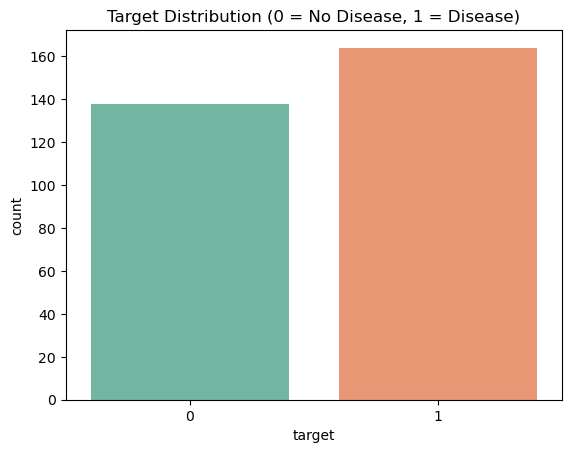

In [54]:
# perform some visualization 
# target distribution
sns.countplot(x='target', data=df, palette="Set2")
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()
# ==>>>  there is no imbalance 

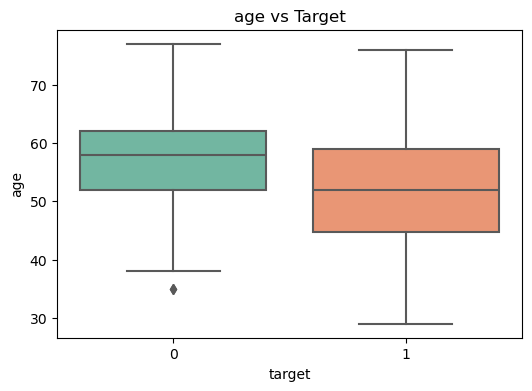

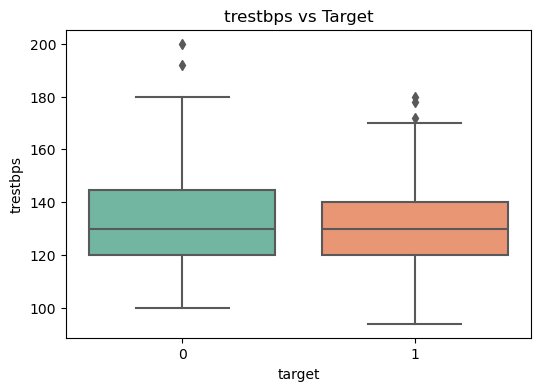

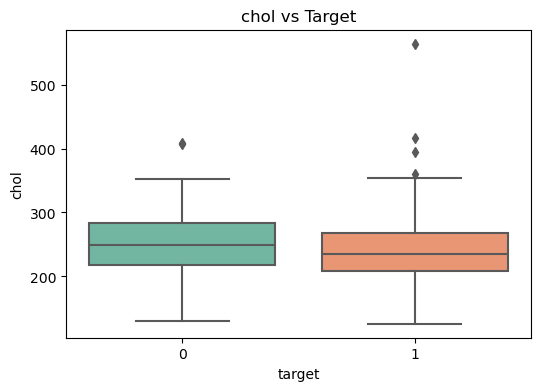

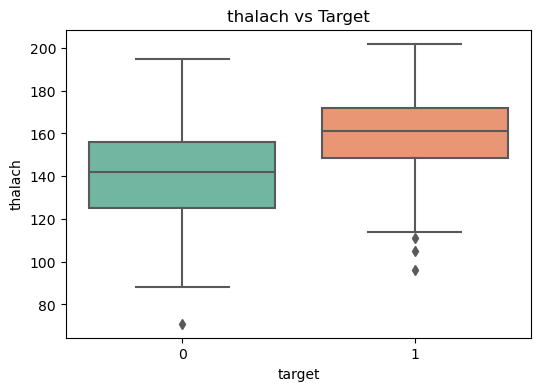

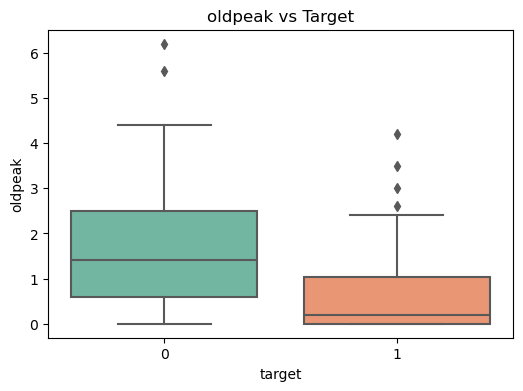

In [55]:
numerical_cols = ['age','trestbps','chol','thalach','oldpeak']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Target")
    plt.show()

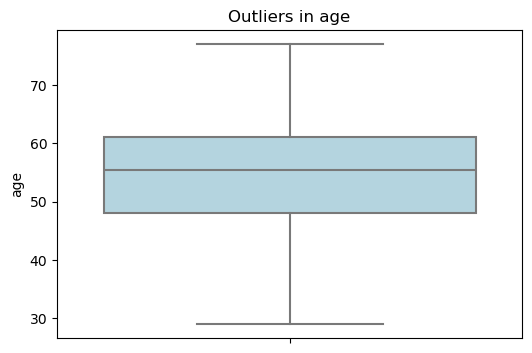

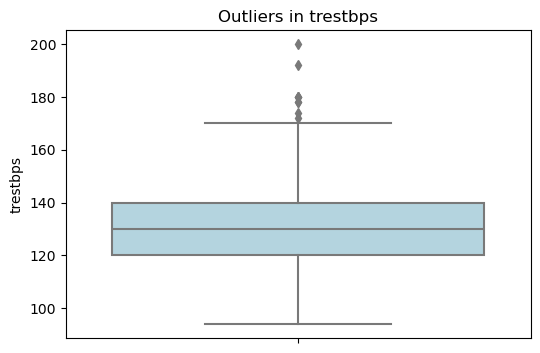

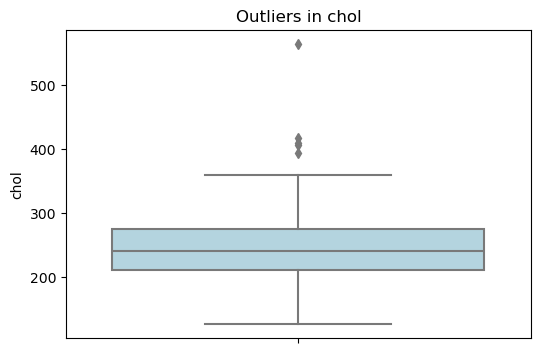

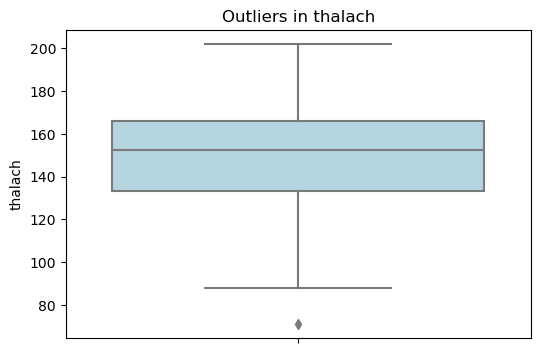

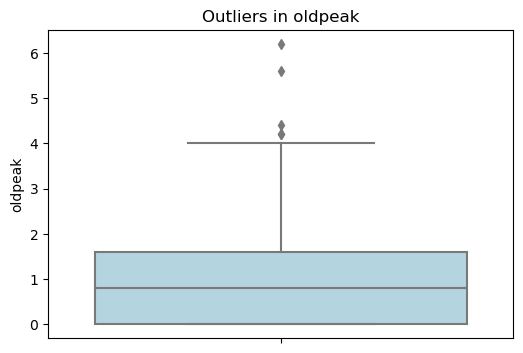

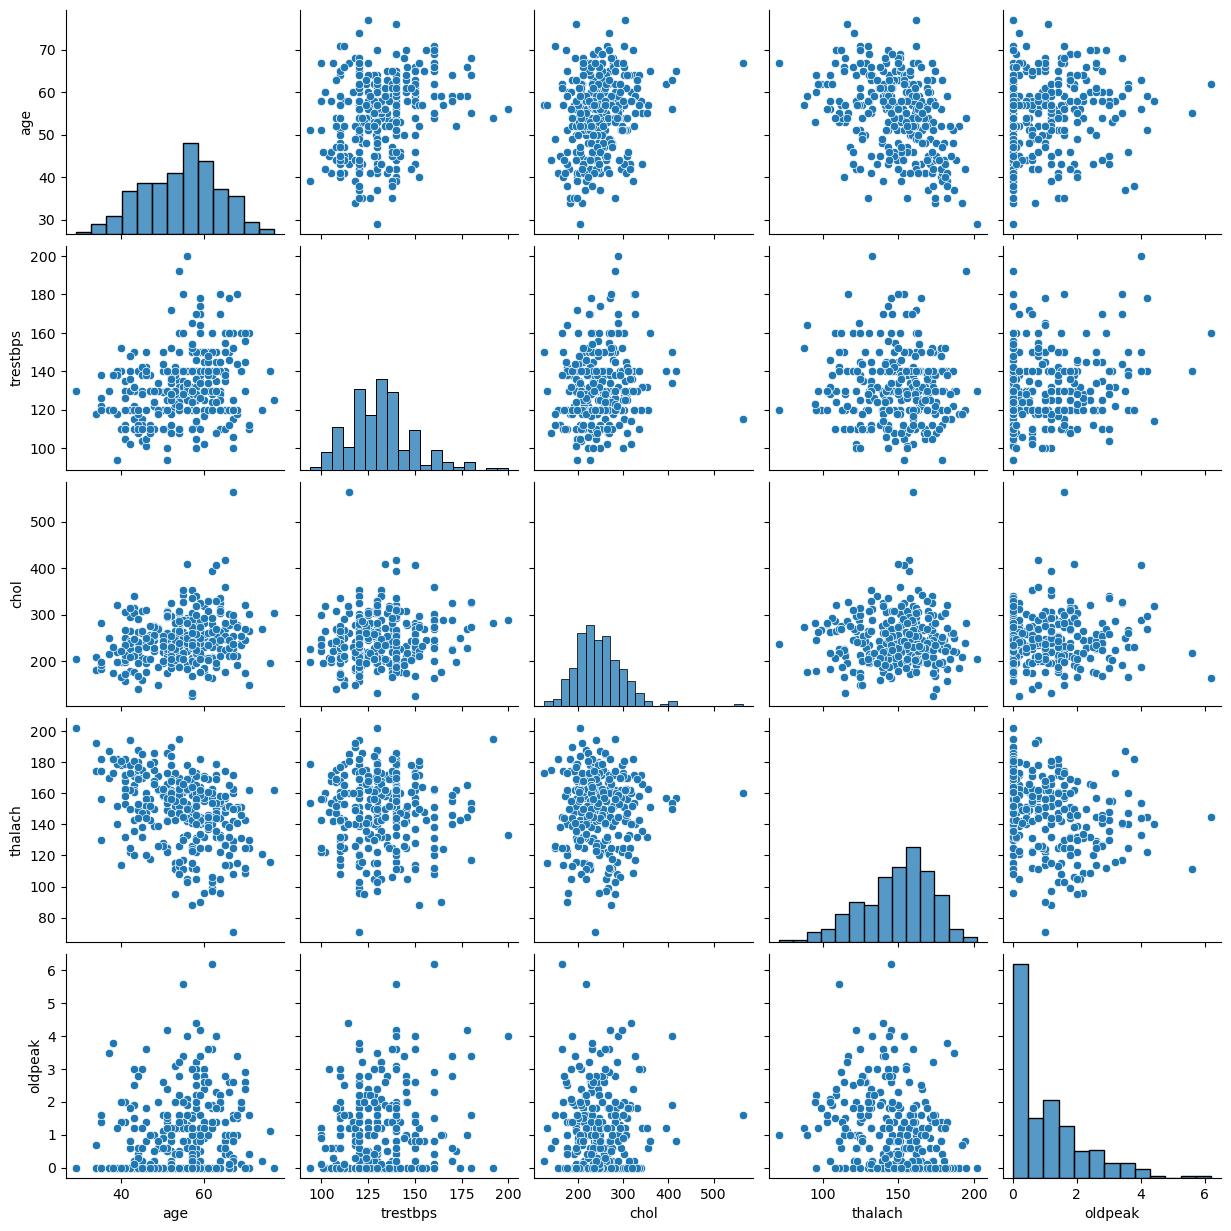

In [56]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Outliers in {col}")
    plt.show()

# Scatterplots
sns.pairplot(df[numerical_cols])
plt.show()

In [57]:
# detect the outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    print(f"- '{col}': {outliers_count}")

- 'age': 0
- 'trestbps': 9
- 'chol': 5
- 'thalach': 1
- 'oldpeak': 5


In [58]:
# handle the outliers 
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()

    df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

In [59]:
# splitting the data into target and feature 
x = df.drop(columns='target' , axis = 1) 
y=  df.target 
display(x.head())
display(y.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [61]:
# split the data into train and test 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test= train_test_split(x,y, test_size=0.2 , random_state=42)


In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


### model training 

In [64]:
model = LogisticRegression()

In [66]:
model.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred = model.predict(x_test)

In [69]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

#### Accuracy Score

In [73]:
training_data_accuracy = accuracy_score(y_pred,y_test)
print(training_data_accuracy)

0.8524590163934426


In [75]:
print(df.head(1))

    age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0    1   3     145.0  233.0    1        0    150.0      0      2.3   

   slope  ca  thal  target  
0      0   0     1       1  


#### Building a Predictive System

In [79]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


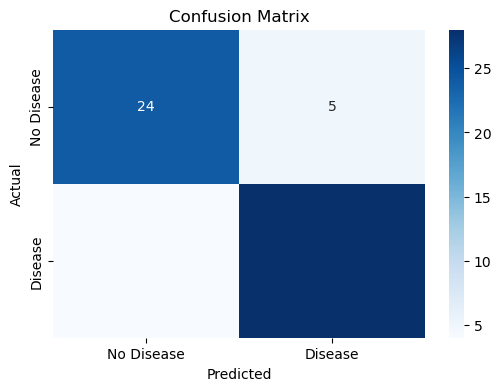

In [80]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease","Disease"],
            yticklabels=["No Disease","Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

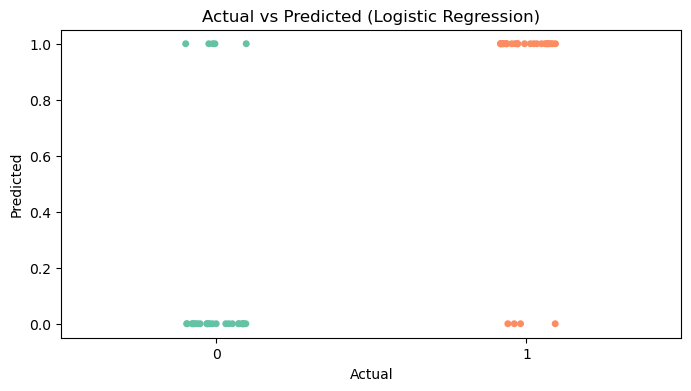

In [81]:
plt.figure(figsize=(8,4))
sns.stripplot(x=y_test, y=y_pred, jitter=True, palette="Set2")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Logistic Regression)")
plt.show()